## Simple Jupyter Notebook to View HDF5 Files

To understand the structure of the HDF5 files and the datasets, see to_hdf5.cc
[Line 331](https://github.com/ftoralesacosta/Event_Mixing/blob/adc1dc27ce5e9ba4abb50b95794937debc242a5a/to_hdf5.cc#L331) of to_hdf5.cc gives the index-event info needed to read from the dataset. 

The track, cluster, and jet datasets follow a similar structure.

In [1]:
from scipy.optimize import curve_fit
import scipy
import scipy.interpolate
import math
import matplotlib.pyplot as plt
import numpy as np
#np.seterr(divide='ignore', invalid='ignore')
import h5py

In [3]:
filename = "18q_pass3_cluster15_celltrack_5x5.hdf5"
dataset_name = 'cluster' #event,cluster,track,jet,mixing
N_Events = 100000 #gets pulled into RAM

In [4]:
f = h5py.File(filename,'r')
dset = f[dataset_name][:N_Events] #this can take, data->memory
print(dataset_name, dset.shape)

cluster (100000, 2022, 32)


In [ ]:
#Example of applying 15 GeV pT cut, and then plotting 5x5 histogram
pT_index = 1 #see to_hdf5.cc for index
cluster_5x5_index = 31
pT_cut_clusters = dset[dset[:,:,pT_index] > 15.]
print(dset.shape) #check shape after cut

In [7]:
cluster_5x5 = pT_cut_clusters[:,31]
print(cluster_5x5.shape)
cluster_5x5 = np.ravel(cluster_5x5) #flatten, needed for histograming

(81703,)


(array([  16.,   18.,   47.,  101.,  161.,  211.,  307.,  442.,  630.,
         891., 1322., 2073., 3719., 1903., 1642., 1553., 1558., 1509.,
        1490., 1517., 1500., 1475., 1538., 1519., 1487., 1581., 1584.,
        1594., 1566., 1572., 1429., 1489., 1497., 1455., 1335., 1274.,
        1264., 1231., 1106., 1080., 1138., 1050., 1117., 1001.,  964.,
         985.,  995.,  907.,  852.,  915.,  812.,  828.,  730.,  786.,
         682.,  750.,  695.,  691.,  634.,  600.,  573.,  567.,  542.,
         504.,  496.,  458.,  456.,  410.,  434.,  412.,  369.,  353.,
         372.,  317.,  329.,  329.,  272.,  254.,  257.,  241.,  231.,
         232.,  229.,  202.,  214.,  178.,  174.,  180.,  191.,  159.,
         154.,  126.,  158.,  130.,  133.,  138.,  110.,  132.,  137.,
         130.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58

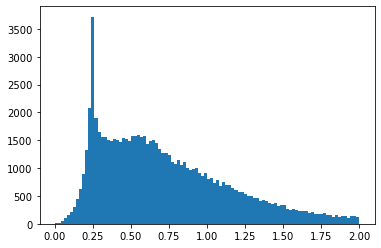

In [8]:
plt.hist(cluster_5x5,bins=100,range=(0,2))

Example to take a look at event numbers of the mixing dataset. This dataset is a bit different from the others in terms of content, but is read the same way.

In [23]:
filename = "18q_pass3_cluster15_celltrack_5x5.hdf5"
#filename = "18q_pass3_cluster15_celltrack_5x5_parallel_pair.hdf5"
mixing = f['mixing'][:N_Events]

In [24]:
print(mixing.shape)

(100000, 300)


In [ ]:

mixed_events = mixing[10,:]
print(mixed_events)

[  1412.   3331.   4342.   7039.   9558.  11347.  12259.  14644.  16000.
  18305.  20678.  22129.  25828.  27030.  28686.  30796.  32494.  35144.
  37614.  38930.  40939.  42989.  45649.  47588.  48342.  50992.  53855.
  54113.  56379.  58276.  61194.  62541.  64139.  67634.  68922.  70941.
  72284.  75601.  76005.  79666.  81653.  83743.  84099.  86338.  88910.
  91772.  92239.  94376.  96654.  99281. 100167. 103525. 104517. 107769.
 108072. 111318. 112173. 115222. 116186. 119045. 121675. 123775. 125066.
 127639. 128864. 130546. 132574. 135850. 136233. 139043. 141248. 143570.
 145768. 147679. 148397. 151804. 152119. 155252. 157125. 159062. 160733.
 162906. 165419. 166972. 168820. 170560. 173180. 174510. 177738. 179367.
 181122. 183216. 185872. 187451. 188798. 191972. 192104. 195679. 196528.
 198411. 200601. 202868. 205351. 207152. 209737. 210564. 213380. 214883.
 217145. 218050. 221082. 222264. 224183. 226107. 228130. 231576. 233486.
 235184. 237306. 239612. 241658. 243417. 245394. 24

In [ ]:
print(mixed_events)

In [ ]:
[  1476.   3004.   4163.   7564.   9965.  11681.  13871.  15014.  17394.
  19264.  21732.  23628.  24426.  26714.  28038.  30686.  33462.  35957.
  37439.  38691.  40218.  43304.  45877.  47172.  49130.  50251.  53611.
  54466.  57396.  59537.  61610.  62110.  64603.  66084.  69238.  70730.
  72313.  74245.  76146.  79913.  80739.  82317.  84730.  86652.  89475.
  91012.  93005.  95588.  97531.  99794. 101051. 103851. 105268. 106994.
 108165. 110384. 112390. 114673. 117783. 118628. 120949. 122169. 124784.
 127870. 128288. 130744. 133532. 134344. 137886. 138559. 140640. 142111.
 145978. 146578. 149247. 151007. 153047. 154876. 157492. 159089. 161417.
 163272. 165425. 166542. 169514. 171714. 172379. 175327. 176055. 178434.
 181662. 182249. 184328. 186324. 189385. 191615. 192533. 194421. 197219.
 198970. 201739. 202046. 204018. 206614. 209350. 210682. 212424. 215275.
 216015. 219109. 221936. 223146. 225100. 227835. 228758. 231006. 232368.
 234911. 236399. 238771. 241414. 243602. 244001. 247905. 248012. 251335.
 252231. 255693. 256195. 259253. 260926. 262636. 265150. 267074. 268131.
 270206. 273046. 275609. 277856. 279223. 280447. 283225. 284300. 286671.
 289186. 290252. 293939. 294330. 297787. 299535. 300237. 302472. 305810.
 306866. 308570. 311468. 312829. 314149. 317577. 319388. 321120. 322843.
 325866. 326399. 328133. 331859. 333019. 334378. 337167. 339129. 340030.
 342459. 344799. 346075. 349501. 350756. 352915. 354805. 357445. 359690.
 360052. 362351. 365001. 366944. 368170. 371086. 373322. 374429. 376666.
 378518. 380012. 383602. 384621. 386675. 388479. 391452. 393972. 394323.
 397569. 398079. 400645. 403781. 404745. 407214. 408571. 411609. 413107.
 414784. 417649. 418944. 420498. 423292. 424143. 426627. 429361. 430834.
 433808. 435882. 436736. 439171. 440918. 442518. 444757. 446323. 448598.
 450699. 452196. 454173. 456771. 459136. 461310. 463826. 464674. 467089.
 469810. 471959. 473509. 475237. 477623. 479809. 481627. 482021. 484768.
 486761. 489852. 491520. 493442. 495301. 496330. 499025. 501476. 502904.
 505503. 506143. 508222. 511114. 513953. 514925. 517894. 518372. 520638.
 522144. 524797. 526059. 529436. 531706. 532676. 535602. 536132. 538867.
 541270. 543079. 545545. 546957. 548287. 550963. 552018. 555596. 557282.
 559876. 561500. 563894. 564948. 567267. 568068. 570924. 572497. 575155.
 577143. 579273. 580642. 583431. 585372. 587382. 588794. 590804. 592743.
 594589. 596642. 598149.]

In [ ]:
z = 0.660525
mb z = -8.30268

multp = 5162.6
mb multp = 28840.7

v2 = 0.177621
mb v2 = -1.54028

cent = 48.05
mb cent = 7.35

In [ ]:
z = 4.50845
mb z = 2.51117

multp = 31236.4
mb multp = 27901.5

v2 = 1.10191
mb v2 = -0.451804

cent = 6.15
mb cent = 8.65

In [ ]:
Mixed Event Number 0 / 1
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event.cc:426: 2 / 10
120

120

z = -9.73831
mb z = -4.6367

multp = 28862
mb multp = 4685.22

v2 = -0.353449
mb v2 = -0.980598

cent = 7.65
mb cent = 49.45
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event.cc:426: 3 / 10
234

234

z = -5.04641
mb z = 0.228518

multp = 22371.1
mb multp = 32338.5

v2 = -0.576575
mb v2 = -1.56899

cent = 14.45
mb cent = 4.85
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event.cc:426: 5 / 10
941

941

z = 1.20262
mb z = -4.86569

multp = 12895.1
mb multp = 32494.2

v2 = 0.92217
mb v2 = -1.14914

cent = 28.65
mb cent = 4.55
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event.cc:426: 7 / 10
1978

1978

z = -8.12426
mb z = -5.9714

multp = 13898.5
mb multp = 16693.7

v2 = 1.51679
mb v2 = 1.13293

cent = 26.45
mb cent = 21.65
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event.cc:426: 8 / 10
1425

1425

z = -4.16866
mb z = 8.74077

multp = 25099.9
mb multp = 9136.53

v2 = 1.48862
mb v2 = 0.304875

cent = 11.55
mb cent = 36.45
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event.cc:426: 9 / 10
596

596

z = 4.50845
mb z = 2.51117

multp = 31236.4
mb multp = 27901.5

v2 = 1.10191
mb v2 = -0.451804

cent = 6.15
mb cent = 8.65

In [ ]:
Mixed Event Number 0 / 1
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 0 / 10
0
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 1 / 10
1
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 2 / 10
2

Isolation Bool = 1
Signal Region = 0.1 to 0.3
Background Region = 0.6 to 1.5
Shower = 0.318194; Shower Shape = cluster_5x5all; Signal BOOL = 0; Background BOOL = 0

Mixed Event = 120

120

120

z = -9.73831
mb z = -4.6367

multp = 28862
mb multp = 4685.22

v2 = -0.353449
mb v2 = -0.980598

cent = 7.65
mb cent = 49.45

1
1
1HERE
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 3 / 10
3

Isolation Bool = 0
Signal Region = 0.1 to 0.3
Background Region = 0.6 to 1.5
Shower = 0.164239; Shower Shape = cluster_5x5all; Signal BOOL = 1; Background BOOL = 0

Mixed Event = 234

234

234

z = -5.04641
mb z = 0.228518

multp = 22371.1
mb multp = 32338.5

v2 = -0.576575
mb v2 = -1.56899

cent = 14.45
mb cent = 4.85

0
1
1HERE
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 4 / 10
4
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 5 / 10
5

Isolation Bool = 0
Signal Region = 0.1 to 0.3
Background Region = 0.6 to 1.5
Shower = 1.1137; Shower Shape = cluster_5x5all; Signal BOOL = 0; Background BOOL = 1

Mixed Event = 941

941

941

z = 1.20262
mb z = -4.86569

multp = 12895.1
mb multp = 32494.2

v2 = 0.92217
mb v2 = -1.14914

cent = 28.65
mb cent = 4.55

1
1
1HERE
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 6 / 10
6
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 7 / 10
7

Isolation Bool = 0
Signal Region = 0.1 to 0.3
Background Region = 0.6 to 1.5
Shower = 0.586846; Shower Shape = cluster_5x5all; Signal BOOL = 0; Background BOOL = 0

Mixed Event = 1978

1978

1978

z = -8.12426
mb z = -5.9714

multp = 13898.5
mb multp = 16693.7

v2 = 1.51679
mb v2 = 1.13293

cent = 26.45
mb cent = 21.65

0
1
0HERE
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 8 / 10
8

Isolation Bool = 0
Signal Region = 0.1 to 0.3
Background Region = 0.6 to 1.5
Shower = 0.559496; Shower Shape = cluster_5x5all; Signal BOOL = 0; Background BOOL = 0

Mixed Event = 1425

1425

1425

z = -4.16866
mb z = 8.74077

multp = 25099.9
mb multp = 9136.53

v2 = 1.48862
mb v2 = 0.304875

cent = 11.55
mb cent = 36.45

1
1
1HERE
/project/projectdirs/alice/ftorales/gammajet/cpp/h5_mixed_event_parallel.cc:438: 9 / 10
9

Isolation Bool = 1
Signal Region = 0.1 to 0.3
Background Region = 0.6 to 1.5
Shower = 27.9813; Shower Shape = cluster_5x5all; Signal BOOL = 0; Background BOOL = 0

Mixed Event = 596

596

596

z = 4.50845
mb z = 2.51117

multp = 31236.4
mb multp = 27901.5

v2 = 1.10191
mb v2 = -0.451804

cent = 6.15
mb cent = 8.65

0
0
1HERE 